# Graph Machine Learning (Parte 1)




>  ¿Qué tienen en común la recomendación de productos de Amazon, la predicción de amigos de LinkedIn o cálculo de rutas de Google Maps?
> - ¡Que todos ellos utilizan grafos!

Los grafos -también llamadas redes, o networks- son una de las áreas de analítica avanzada con mayor potencial en los últimos años. ¿Por qué? Porque, como iremos viendo en este curso, nos permiten modelar y resolver problemas muy complejos de forma sencilla.

# Introducción a los Grafos

La definición más sencilla de Grafos es *la red de conexiones entre distintas entidades*. 

Toda la teoría de grafos o Network Science se basa en el análisis de estos dos elementos: "entidades" (a los que llamaremos nodos o nodes) y "conexiones" a los que llamaremos ejes o edges). 

En la vida real nos encontramos con muchísimas situaciones que pueden modelarse con grafos:

- La red de amistad entre todos los usuarios de Facebook.
- El histórico de compras de distintos clientes de Amazon.
- La red de publicaciones científicas de distintos investigadores.
- La red de carreteras de España.




![](../docs/img/04_map_graph.png)

Figura 2. Un mapa de carreteras también se puede modelar como un grafo.



Si lo piensas, en cualquier de estos ejemplo podemos encontrar nodos (ej, usuarios) y ejes (ej, amistad entre usuarios). Te dejo el resto para que lo pienses! ;).



Éste es, por ejemplo el grafo de internet, ejes son los enlaces entre dos direcciones IP. Pero no te preocupes que el curso será más sencillo

![](https://upload.wikimedia.org/wikipedia/commons/d/d2/Internet_map_1024.jpg)
Mapa parcial de Internet basado en la información obtenida del sitio opte.org el 15 de enero de 2005. Cada linea dibujada entre dos nodos representa el enlace entre dos direcciones IP. La longitud de las líneas es proporcional al tiempo de espera entre los nodos. La imagen representa 30% de las redes tipo C accesibles al programa de colección de datos de 2005.

![](../docs/img/02_gif_graph.svg)

## Networkx

El paquete más utilizado para trabajar con grafos en Python es Networkx. Según su documentación *NetworkX es un paquete de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas*.

![](https://networkx.org/_static/networkx_logo.svg)

[Aquí](https://networkx.org/documentation/stable/reference/introduction.html) podrás consultar toda la documentación de la librería.

Instala la librería con `pip install networkx` y empezamos a modelar grafos!

Hay dos formas de crear grafos:

1. De forma manual.
2. Desde una archivo o un DataFrame.

Lo más frecuente es crearlo desde archivos, pero para que veas como funciona, aquí tienes un ejemplo mínimo.

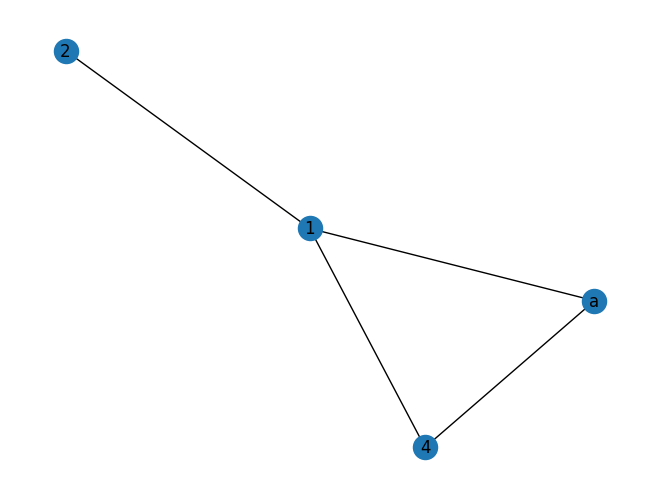

In [1]:
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (1, "a"), ("a",4), (4,1)])

# Dibujamos la red.
nx.draw(G, with_labels=True)

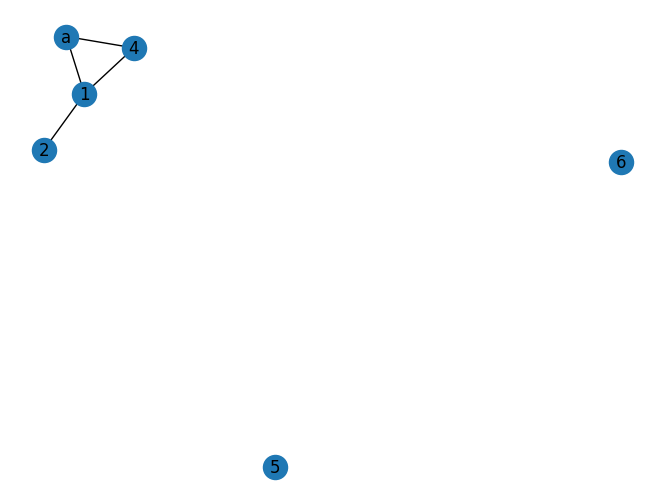

In [2]:
G.add_nodes_from([5,6])
# Dibujamos la red.
nx.draw(G, with_labels=True)

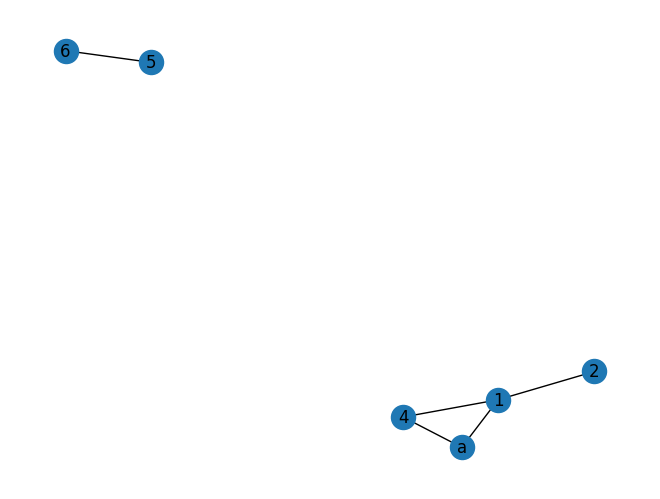

In [3]:
G.add_edges_from([(5,6)])


# Dibujamos la red.
nx.draw(G, with_labels=True)

In [4]:
# Imprimimos por pantalla los nodos y ejes.
print(G.nodes)
print(G.edges)


[1, 2, 'a', 4, 5, 6]
[(1, 2), (1, 'a'), (1, 4), ('a', 4), (5, 6)]


Estadísticas básicas de la red. Como te puedes imaginar, las estadísticas más básicas de la red son el número de nodos y el número de ejes. Más tarde, dedicaremos un apartado específicamente para estadísticas de los grafos.

In [5]:
nodos = G.number_of_nodes()
ejes = G.number_of_edges()
print(f"Grafo con {nodos} nodos y {ejes} ejes")

Grafo con 6 nodos y 5 ejes


Si queremos acceder a los nodos vecinos de un nodo utilizamos el método `G.neighbors()`

In [6]:
# Extraemos los vecinos del nodo "a"
list(G.neighbors("a"))

[1, 4]

> Nota. El nombre de los nodos puede ser tanto numérico como caracteres (en el ejemplo aparecen combinados):

Y para crear un grafo desde un dataframe que contenga los ejes utilizaremos `networkx.from_pandas_edgelist`.

In [7]:
conexiones = pd.DataFrame(
    {
        "nodo_1": [0, 1, 2],
        "nodo_2": [2, 2, 3],
    }
)
conexiones

,nodo_1,nodo_2
0,0,2
1,1,2
2,2,3


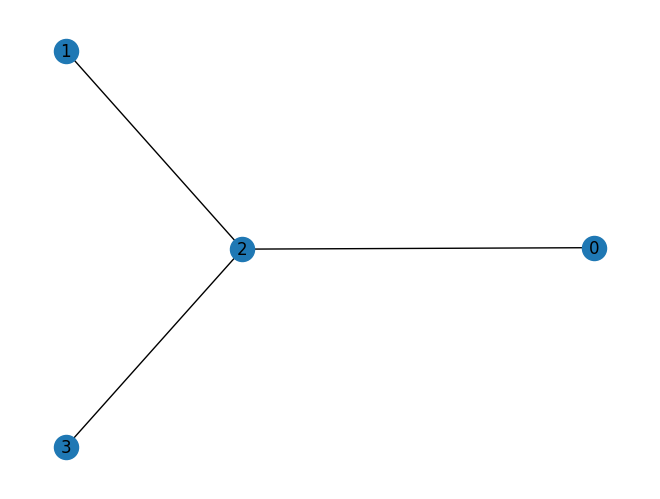

In [8]:
G = nx.from_pandas_edgelist(
    conexiones,
    source="nodo_1",
    target="nodo_2")
nx.draw(G, with_labels=True)




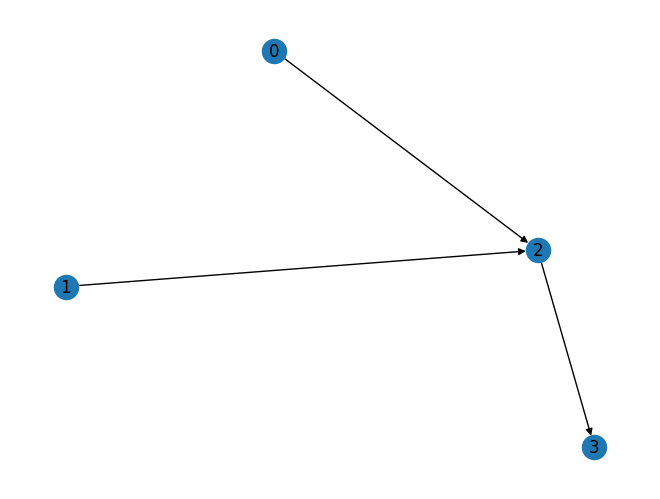

In [9]:
# Grafo dirigido
G = nx.from_pandas_edgelist(
    conexiones,
    source="nodo_1",
    target="nodo_2", 
    create_using=nx.DiGraph)
nx.draw(G, with_labels=True)

## Matriz de adjacencia

Probablemente el concepto más importante en la teoría de grafos es la matriz de adyacencia (o en inglés, the adjacency matrix).

Hay varias formas de representar un grafo. 

Básicamente mencionamos dos:
1. La lista de adyacencia (una lista de las conexiones).
2. La matriz de adyacencia: una matriz binaria (veremos que hay exepciones) de dimensión NxN (siendo N el número de nodos) donde aparede un 1 si la conexión existe.

Para grafos no dirigidos (en el siguiente punto veremos otros tipos de grafos) esta matriz es simétrica: si existe conexión entre los nodos 1 y 5, también existe la conexión entre los nodos 5 y 1.

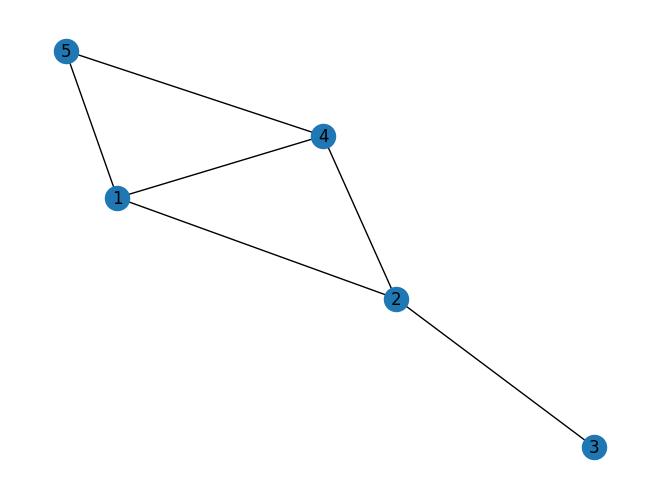

In [10]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

In [11]:
# neighbors
nx.to_dict_of_lists(G)

{1: [2, 4, 5], 2: [1, 3, 4], 3: [2], 4: [1, 2, 5], 5: [1, 4]}

In [12]:
adjM = nx.adjacency_matrix(G)

# Pasamos de matriz sparse a dense para poder imprimirla por pantalla
adjM = adjM.todense()
adjM

matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 0, 0, 1, 0]])

![](../docs/img/05_adjacency_matrix.jpg)

## Distancia entre nodos

La matriz de adyacencia nos da de forma implícita las distancias de orden 1 entre cualquier par de nodos. La distancia de orden 1 es trivial, ya que son directamente las conexiones del grafo.

Una propiedad interesante de la matriz de adyacencia es que si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`. 

Así, la matriz de distancia de orden 2 nos mostrará todos los pares de nodos que están conectados con un nodo intermedio. En el ejemplo, los nodos `2` y `5` tienen entre medias los nodos `4` y `1`, es decir, existen dos caminos posibles de orden 2 que los conectan: el `2-4-5` y el `2-1-5`. Por ese motivo, el elemento [2,5] de la matriz de distancias de orden 2 es 2.

In [13]:
distancias_orden_dos = adjM*adjM

print(distancias_orden_dos)
# elemento 2,5 en python, se resta uno a los índices
print(f"Caminos de orden dos entre los nodos 2 y 5 = {distancias_orden_dos[1,4]}")

[[3 1 1 2 1]
 [1 3 0 1 2]
 [1 0 1 1 0]
 [2 1 1 3 1]
 [1 2 0 1 2]]
Caminos de orden dos entre los nodos 2 y 5 = 2


## Tipos de Grafos


Todo grafo se clasifica según tres criterios principales.

![](../docs/img/drawio/01_graph_types.drawio.svg)

En la siguiente figura se representan los distintos tipos de grafos junto con sus matrices de adyacencia.


![](../docs/img/01_tipos_de_grafos.jpg)

### 1. Dirigido/ no dirigido. Grafos A y B.

Los ejes tienen dirección definida (si existe la conexión entre los nodos A->B, no tiene porqué existir la conexión entre b->a). Los ejes de estos grafos se suelen representar con una flecha. Ejemplo: envío de emails, donde la dirección es qué usuario envía un email a otro.

La matriz de adyacencia de los grafos dirigidos deja de ser simétrica.




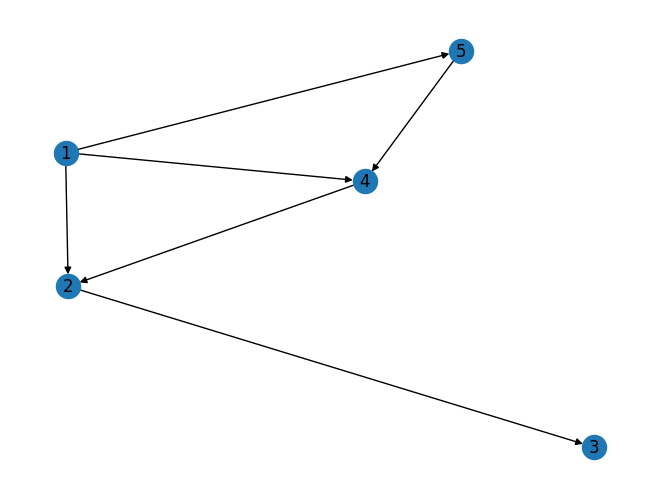

In [14]:
# Creamos una instancia tipo "Grafo dirigido".
G = nx.DiGraph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])

# Dibujamos la red. Más adelante daremos más detalles sobre representación de grafos.
nx.draw(G, with_labels=True)

In [15]:
adjM = nx.adjacency_matrix(G)
adjM.todense()

matrix([[0, 1, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0]])

### 2. Ponderados / No ponderados. Grafos A y C

los ejes del grafo tienen un peso asociado. Los ejes de estos grafos se suelen representar con una anchura distinta en función del peso. Ejemplo: Red social, donde el peso es el número de interacciones entre dos usuarios.



In [16]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_weighted_edges_from([(1, 2, 0.5), (2,3, 0.9), (1, 4, 0.1), (1, 5, 0.75), (4,2, 0.01), (5,4, 0.3)])

G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

Como podemos ver, ahora los ejes tienen el atributo weight.

En el siguiente apartado explicaremos más detalles de los atributos asociados a nodos y ejes.



### 3. Simples / bipartitos / tripartitos, etc. Grafos A y D

Los nodos del grafo tienen una (simple), dos (bipartito) o más naturalezas diferentes. Un ejemplo de un grafo bipartito es la red científica de publicaciones. Algunos nodos serán autores y otros serán artículos. En el grafo existirá un eje cuando un autor publique un artículo. 

En este último tipo de grafos es importante tener en cuenta que las conexiones únicamente puden ocurrir entre nodos de distinta naturaleza (ejemplo, entre autores y publicaciones).

Una propiedad importante de los grafos bipartitos es que se pueden realizar "proyecciones" (Grafos "E"). Esto es construir un grafo para cada uno de los tipos de nodos en función de sus conexiones comunes. Más adelante veremos un ejemplo completo de estos grafos.


> Un grafo puede tener cualquier combinación de estas características: por ejemplo, podemos tener un grafo simple, dirigido y ponderado

Los grafos bipartitos son unos de los tipos de grafos más utilizados en el Graph Machine Learning. En el siguiente enlace encontrarás un case study con Grafos Bipartitos [proximamente].

## Atributos de nodos y ejes



Supongamos que estamos analizando los datos de una red social, en el que los nodos son usuarios y los ejes representan si dos usuarios son amigos.

1. En este caso puede ser que queramos guardar información relativa a los usuarios, como por ejemplo:

    - Nombre y apellidos.
    - Edad.
    - Profesión.
    - Aficiones.

    Los atributos de los nodos se añaden con el método `networkx.set_node_atributes(Grafo, diccionario, nombre)`


2. Por otro lado, los ejes puede ser que también tengan atributos:

    - Fecha en la que inició la amistad.
    - Intensidad de la amista (weight)

    Los atributos de los ejes se añaden con el método `networkx.set_edge_atributes()`

Los atributos de nodos y ejes son muy importantes en el Graph Machine Learning. De hecho, las Graph Neural Networks utilizan atributos de ejes y nodos para hacer predicciones. 

> Por ejemplo, si queremos predecir futuras amistadas entre usuarios, será interesante tener en cuenta las aficiones de cada usuario: (Será más probable que usuarios con aficiones similares se hagan amigos en un futuro).


In [17]:
# Creamos una instancia tipo "Grafo".
G = nx.Graph()

# Añadimos conexiones
G.add_edges_from([(1, 2), (2,3), (1, 4), (1, 5), (4,2), (5,4)])


G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (4, 5, {})])

In [18]:
# Añadimos atributos de los nodos
node_name = {
    1:"Jaime",
    2:"María",
    3:"Julio",
    4:"Rosa",
    5:"Alberto"
}

node_aficiones = {
    1:["Futbol"],
    2:["Baile", "Pádel"],
    3:["Golf", "Baile"],
    4:["Cocina"],
    5:["Cocina", "Jamón"]
}

nx.set_node_attributes(G, node_name, name="Nombre")
nx.set_node_attributes(G, node_aficiones, name="Aficiones")

# Añadimos atributos de los ejes
edges_weight = {
    (1, 2): 0.5, 
    (2,3): 0.9, 
    (1, 4): 0.1, 
    (1, 5): 0.75, 
    (4,2): 0.01, 
    (5,4): 0.3
}

nx.set_edge_attributes(G, edges_weight, name="weight")



Para acceder a los atributos de nodos y ejes utilizamos `G.nodes(data=True)` o `G.edges(data=True)`. 
Estos comandos nos devuelven una objeto de nodos/ejes con un diccionario asociado con todos los atributos.

En nuestro caso, los nodos no contienen ningún atributo todavía.

In [19]:
G.nodes(data=True)

NodeDataView({1: {'Nombre': 'Jaime', 'Aficiones': ['Futbol']}, 2: {'Nombre': 'María', 'Aficiones': ['Baile', 'Pádel']}, 3: {'Nombre': 'Julio', 'Aficiones': ['Golf', 'Baile']}, 4: {'Nombre': 'Rosa', 'Aficiones': ['Cocina']}, 5: {'Nombre': 'Alberto', 'Aficiones': ['Cocina', 'Jamón']}})

In [20]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

> TRUCO: los atributos de ejes y nodos se pueden iterar directamente como si se tratase de un diccionario!

In [21]:
[print(f"Eje que conecte el nodo {m} con el nodo {n} y tiene un peso de {w['weight']}.") for m, n, w in G.edges(data=True)]

Eje que conecte el nodo 1 con el nodo 2 y tiene un peso de 0.5.
Eje que conecte el nodo 1 con el nodo 4 y tiene un peso de 0.1.
Eje que conecte el nodo 1 con el nodo 5 y tiene un peso de 0.75.
Eje que conecte el nodo 2 con el nodo 3 y tiene un peso de 0.9.
Eje que conecte el nodo 2 con el nodo 4 y tiene un peso de 0.01.
Eje que conecte el nodo 4 con el nodo 5 y tiene un peso de 0.3.


[None, None, None, None, None, None]

> EJERCICIO: qué ejes tienen un peso mayor que 0.5?

In [22]:
threshold = 0.5
edge_list = [
    (n, m) for n, m, d in G.edges(data=True) if d["weight"] >= threshold
]

edge_list

[(1, 2), (1, 5), (2, 3)]

Y don un subset de ejes, podemos filtrar el grafo:

[(1, 2), (1, 5), (2, 3)]


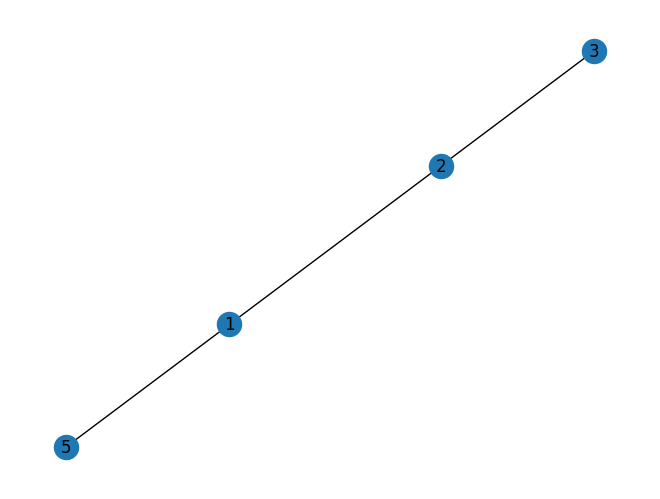

In [23]:
G_filtrado = G.edge_subgraph(edge_list)
print(G_filtrado.edges)
nx.draw(G_filtrado, with_labels=True)


In [24]:
conexiones = pd.DataFrame(
    {
        "source": [0, 1, 2],
        "target": [2, 2, 3],
        "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    }
)
conexiones

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


# Diagnóstico de los grafos

Como bien hemos aprendido en [cienciadedatos.net](cienciadedatos.net), en ciencia de datos, lo primero que hay que hacer al tener un dataset es realizar un análisis exploratorio de los datos o EDA por sus siglas en inglés.

Pero... ¿Cómo se puede explorar un grafo? Imagina que tenemos un grafo con miles de nodos y decenas de miles de conexiones...

Pues bien, para ello introducimos las propiedades de los grafos. Algunas son más importantes que otras, pero entre todas ellas nos darán una primera visión del grafo que estamos analizando.

Se resumen en tres grupos principales según se relacionen con 1) nodos individuales, 2) conjuntos de nodos o 3) propiedades generales de la red (para algunas de ellas mantendremos los nombres en inglés, ya que es como se las conoce generalmente en el campo de análisis de redes):

![](../docs/img/drawio/03_properties.drawio.svg)

En este apartado utilizaremos el primer modelo de generación de grafos: barbell_graph. Los modelos de generación de grafos son algoritmos que generan grafos con distintas propiedades. Hay muchos modelos de generación de grafos, iremos viendo algunos de ellos a medida que avance el curso.

El barbell graph permite generar un grafo con dos conjuntos de N nodos con alta conectividad (m1) unidos por una cadena de nodos (m2).

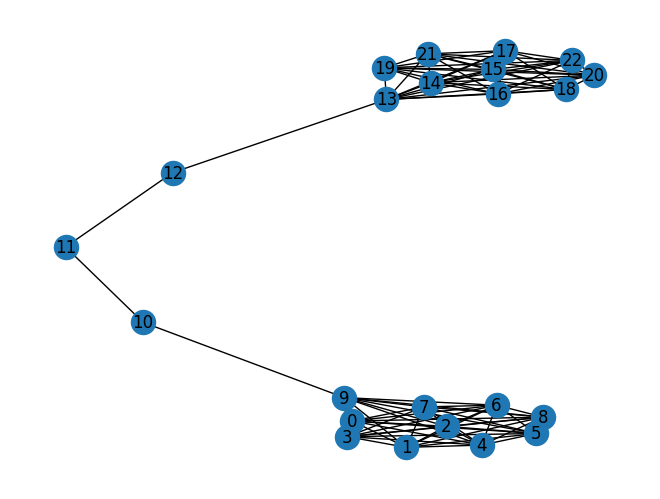

In [ ]:
G =nx.barbell_graph(m1=10, m2=3)
nx.draw(G, with_labels=True)

### ¿Cuál es el nodo más importante de la red?

Tras un primer vistazo, podemos observar que algunos nodos tendrán propiedades muy diferentes.

Por ejemplo, los nodos 11, 10 y 12 son nodos muy importantes si consideramos la "betweenness de la red". Lo que quiere decir que estos nodos forma parte del único camino posible entre muchos pares de nodos. En otras palabras: si estos nodos desaparecen, los dos clusters de nodos dejarían de estar conectados.

Por otro lado, los nodos de los clusters, por ejemplo el nodo 17, tiene una alta conectividad: está conectado a muchos otros nodos (alto degree).

Dependiendo de a qué característica le demos más importancia, diremos que el nodo más importante de la red es uno u otro.

## Número de nodos y ejes

Lo primero que exploraremos del grafo son el número de ejes y de nodos. Nuestro grafo tiene 23 nodos y 94 ejes.

In [ ]:
G.number_of_nodes(), G.number_of_edges()

(23, 94)

## 1. Centralidad

Cuando se analizan redes es común que se desee encontrar los nodos que son más importantes para la red. En términos generales, la importancia de un nodo depende de su posición en la red. A medida que las redes se vuelven más complejas, será necesario emplear medidas de centralidad para describirlas. Así como en la estadística se cuenta con medidas de tendencia central como la mediana y la moda para caracterizar dónde se encuentra el “centro” de los datos, en el caso de las redes se cuenta con medidas de centralidad para determinar los nodos más importantes. 

En otras palabras, la centralidad mide la importancia de cada nodo según distintos criterios. Por lo tanto, estas funciones nos devolverán un vector de la misma longitud que el número de nodos.



### 1.1. Medidas locales

El adjetivo local se debe a que estas medidas solo toman en cuenta la influencia de un nodo sobre sus compañeros más cercanos. Estas medidas locales de centralidad muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

#### 1.1.1 Grado de centralidad (Degree): Número de conexiones de un nodo.

Para obtener esta medida basta con contar el número de enlaces relacionados con cada nodo (Tanto los entrantes como los salientes de cada nodo). Tal y como está definida, esta estadística hará que destaquen aquellos nodos conectados a las sub-redes más amplias. Un valor más grande de esta medida indicará una mayor centralidad del nodo. 

El degree de un nodo se puede calcular directamente desde la matriz de adyacencia del grafo.

* Para un grafo no dirigido:

$Degree = \sum_i{A_{ij}} = \sum_j{A_{ij}}$

Esta métrica se puede presentar también de manera normalizada; es decir, dividiendo el número de enlaces relacionados con cada uno de los n nodos dividido por n-1.

* Degree Centrality: Número de conexiones de un nodo normalizado.

$Degree Centrality = \frac{\sum_i{A_{ij}}}{N-1}$

Otras variantes de esta medida de centralidad solo consideran los enlaces de salida (out-degree) de cada nodo o solo los de entrada (in-degree). Estas últimas dos métricas pueden estar normalizadas o no. La normalización puede ser importante cuando se quiere comparar esta métrica entre diferentes grafos con números de nodos muy diferentes.

* Para un grafo dirigido, existen dos tipos de Degree según nos refiramos a conexiones entrante o salientes: 

$inDegree = \sum_i{A_{ij}}$

$outDegree = \sum_j{A_{ij}}$


#### 1.1.2 Betweenness

Esta medida cuantifica el número de veces que un nodo actúa como un puente a lo largo de la ruta geodésica (esto es, la de menor longitud) entre dos nodos. Su cálculo implica los siguientes pasos: 

1. Contar el número de rutas que unen un par de nodos (i y j).
2. Encontrar la proporción de esas rutas que pasan por un tercer nodo (v).
3. Repetir el cálculo para todas las parejas de nodos posibles (con la condición de que i y j sean diferentes de v) hallando en cada caso la proporción de rutas que pasan por el nodo v
4. Sumar todas las proporciones obtenidas. Tomando σij como el número de rutas de mínima distancia que unen a los nodos i y j, y σij(v) como el número de rutas de distancia mínima que unen a estos nodos y que pasan por el nodo v, entonces la métrica de Betweenness para el nodo v está dada por:

$$
\operatorname{Betweenness}(v)=\sum_{i \neq v \varepsilon V} \sum_{j \neq v \varepsilon V} \delta_{i j}
$$

donde $\delta_{i j}(v)=\frac{\sigma_{i j}(v)}{\sigma_{i j}}$.

Esta métrica solo toma valores entre cero y el número de parejas posibles dentro del grafo (excluyendo el nodo para el cual se está efectuando el cálculo). Esto es, si N es el número total de nodos, entonces la cota superior toma el valor de $\frac{(N-1) !}{2 !((N-1)-2) !}$.

Por otra parte, tal y como se ha mencionado de manera implícita, entre mayor sea el Betweenness mayor será la centralidad del nodo. En la red que veremos en el siguiente apartado, el nodo 11 es el más propenso a actuar como puente entre sus compañeros. 

Este estadístico también se puede presentar de manera normalizada multiplicando cada Between- ness(v) por la siguiente constante:

$\frac{2}{n(n-3)(n+2)}$



### 1.2 Medidas Globales de Centralidad 

Las medidas globales muestran la importancia de un nodo teniendo en cuenta su posición en el conjunto la red. De manera general, estas medidas identifican a aquellos agentes que están mejor ubicados para influir en toda la red lo más rápidamente posible. Ejemplos, de esta medida globales de centralidad son:

#### 1.2.1 Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".

Para un nodo "x", se calcula dividiendo el número de nodos a los que se puede ir desde ese nodo (N-1) entre la suma de todas distancias de ese nodo "x" al resto de nodos. Es decir, calcula las rutas más cortas entre todos los nodos y asigna una puntuación a cada uno en función de la suma de sus rutas. Mide cuántos pasos se requieren para conectarse a cada uno de los nodos desde un nodo determinado. 

En general, es una medida de cuánto tarda en llegar la información de un nodo al resto de la red. Esta medida se calcula de la siguiente manera:

$ClosenessCentrality = \frac{N-1}{\sum_j{d_{i,j}}}$

Es fácil deducir que esta medida estará entre cero y uno. Adicionalmente, entre más cercana a 1 esté, mayor será la centralidad del nodo.

Así como el grado de centralidad, esta métrica puede calcularse considerando solo las rutas de salida (out) de cada nodo o solo las rutas de entrada (in). Estas últimas dos métricas pueden estar normalizadas o no.

#### 1.2.2. - Excentricidad: 

Mide la distancia de cada nodo al nodo más lejano.

$Excentricidad(i)=\max [\operatorname{dist}(i, j)], \quad \forall j$

### Y ahora, en nuestro grafo con networkx

In [ ]:
# Grado de los nodos: el número de conexiones de cada nodo.
nx.degree(G)

DegreeView({0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 10, 10: 2, 11: 2, 12: 2, 13: 10, 14: 9, 15: 9, 16: 9, 17: 9, 18: 9, 19: 9, 20: 9, 21: 9, 22: 9})

In [ ]:
print(f""""

**1. Propiedades de los nodos.**

Mide la importancia de cada nodo según distintos criterios. Estas funciones nos devolverán un vector de la misma longitud que el número de nodos.

Locales: muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

        - Degree: Número de conexiones de un nodo.
                nx.degree(G)[11] = {nx.degree(G)[11]}
                nx.degree(G)[17] = {nx.degree(G)[17]}

        - Degree Centrality: Número de conexiones de un nodo normalizado con el número global de conexiones.
                nx.degree_centrality(G)[11] = {nx.degree_centrality(G)[11]:.2}
                nx.degree_centrality(G)[17] = {nx.degree_centrality(G)[17]:.2}

Globales: muestran la importancia de un nodo teniendo en cuenta su posición en toda la red.

        - Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".
                nx.closeness_centrality(G)[11] = {nx.closeness_centrality(G)[11]:.2}
                nx.closeness_centrality(G)[17] = {nx.closeness_centrality(G)[17]:.2}

        - Betweenness Centrality: Mide cuántas veces un nodo forma parte del camino más cercano entre dos nodos.
                nx.betweenness_centrality(G)[11] = {nx.betweenness_centrality(G)[11]:.2}
                nx.betweenness_centrality(G)[17] = {nx.betweenness_centrality(G)[17]:.2}

        - Eccentricity: Distancia al nodo más lejano.
                nx.eccentricity(G)[11] = {nx.eccentricity(G)[11]}
                nx.eccentricity(G)[17] = {nx.eccentricity(G)[17]}
""")


"

**1. Propiedades de los nodos.**

Mide la importancia de cada nodo según distintos criterios. Estas funciones nos devolverán un vector de la misma longitud que el número de nodos.

Locales: muestran la importancia de un nodo teniendo en cuenta su posición en un contexto cercano, los nodos que tienen cerca.

        - Degree: Número de conexiones de un nodo.
                nx.degree(G)[11] = 2
                nx.degree(G)[17] = 9

        - Degree Centrality: Número de conexiones de un nodo normalizado con el número global de conexiones.
                nx.degree_centrality(G)[11] = 0.091
                nx.degree_centrality(G)[17] = 0.41

Globales: muestran la importancia de un nodo teniendo en cuenta su posición en toda la red.

        - Closeness Centrality: Da una idea de "Cómo de cerca está un nodo del resto de nodos de la red".
                nx.closeness_centrality(G)[11] = 0.37
                nx.closeness_centrality(G)[17] = 0.29

        - Betweenness Centrality: Mide cu

## 2. Propiedades globales del grafo. Medidas agregadas

Diámetro: mide la máxima excentricidad.

$Dimetro = max[Excentricidad(i)], ∀i$

En el cuadro se puede observar que el diámetro del grafo de la selección francesa para el partido de la final es igual a dos. Esto es, el par de jugadores más alejados en toda la red requieren de dos pases para conectarse.
Densidad: es la proporción de pares de nodos conectados en la red sobre todos los posibles. Si esta medida es 1 (o 100%), entonces el grafo es totalmente conexo (todos los jugadores se conectan de manera directa con todos). Tomando n como el número total de nodos y E como el número de pares conectados en el grafo, entonces, la densidad se calcula como:
D=E 12n(n−1)
donde 21 n(n−1) es el número total de pares de nodos conectados que pueden existir en el grafo. El cálculo de esta medida solo exige el conocimiento de si un par de jugadores se conectaron o no, no
 10
se requiere saber el número de conexiones. Así que se debe transformar la matriz de adyacencia para que contenga solo dos valores: ceros (en caso de que no haya conexión) y unos (cuando hay conexión). Para el equipo francés, según el cálculo mostrado en el cuadro , el parámetro de la densidad toma un valor igual a 66%. Es decir, de todas las posibles conexiones (100%), se hicieron efectivas el 66 %.




- Degree medio: Número de conexiones medio de los nodos de un grafo.
- Densidad del grafo: Número de conexiones / Número posible de conexiones.
$D=\frac{E}{\frac{1}{2} n(n-1)}$



- Diámetro: Excentricidad máxima: Distancia máxima entre dos nodos.
- Transitividad: es una medida de la ocurrencia de pequeñas subredes de tres nodos totalmente conectados.
- Reciprocidad: mide la probabilidad de que, dado que existe una conexión entre i y j que parte de i, exista una conexión entre estos que parta de j. 


In [ ]:
print(f"""

**2. Propiedades globales del grafo.**

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                {nx.average_degree_connectivity(G)}
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                {nx.density(G)}
        - Diámetro: Distancia máxima entre dos nodos.
                {nx.diameter(G)}
                {nx.diameter(G) == max(nx.eccentricity(G))}

        - Otras medidas: Transitividad, Reciprocidad.
                {nx.transitivity(G)}
                {nx.algorithms.clustering(G)}

"""

)



**3. Propiedades globales del grafo.**

        - Degree medio: Número de conexiones medio de los nodos de un grafo.
                {9: 9.11111111111111, 10: 8.3, 2: 4.666666666666667}
        - Densidad del grafo: Número de conexiones / Número posible de conexiones.
                0.3715415019762846
        - Diámetro: Distancia máxima entre dos nodos.
                6
                False

        - Otras medidas: Transitividad, Reciprocidad.
                0.97165991902834
                {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.8, 10: 0, 11: 0, 12: 0, 13: 0.8, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0}




## 3. Propiedades de conjuntos de nodos

Como veremos, el grado del nodo es una de las propiedades más importante de la teoría de grafos ya que se pueden estraer muchas conclusiones de su análisis.

In [46]:
print(f""""

**2. Propiedades entre conjuntos de nodos.**

        - Distancia entre dos nodos
                {list(nx.algorithms.all_pairs_shortest_path(G))[0]}

        - Cliqués: conjuntos de nodos con conectividad completa (todos los nodos conectados con todos)
                {list(nx.algorithms.clique.find_cliques(G))}

""")


"

**2. Propiedades entre conjuntos de nodos.**
        - Distancia entre dos nodos
                (0, {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 9: [0, 9], 10: [0, 9, 10], 11: [0, 9, 10, 11], 12: [0, 9, 10, 11, 12], 13: [0, 9, 10, 11, 12, 13], 14: [0, 9, 10, 11, 12, 13, 14], 15: [0, 9, 10, 11, 12, 13, 15], 16: [0, 9, 10, 11, 12, 13, 16], 17: [0, 9, 10, 11, 12, 13, 17], 18: [0, 9, 10, 11, 12, 13, 18], 19: [0, 9, 10, 11, 12, 13, 19], 20: [0, 9, 10, 11, 12, 13, 20], 21: [0, 9, 10, 11, 12, 13, 21], 22: [0, 9, 10, 11, 12, 13, 22]})
        - Cliqués: conjuntos de nodos con conectividad completa (todos los nodos conectados con todos)
                [[9, 0, 1, 2, 3, 4, 8, 5, 6, 7], [9, 10], [11, 10], [11, 12], [12, 13], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]




# Comparativa de redes

Estas redes de referencia, enumeradas en la Tabla inferior, abarcan sistemas sociales (gráfico de llamadas móviles o red de correo electrónico), redes de colaboración y afiliación (red de colaboración científica, red de actores de Hollywood), sistemas de información (WWW), sistemas tecnológicos y de infraestructura (Internet y red eléctrica). ), sistemas biológicos (interacción de proteínas y red metabólica) y redes de referencia (citas). Difieren ampliamente en sus tamaños, desde tan solo N = 1039 nodos en el metabolismo de E. coli, hasta casi medio millón de nodos en la red de citas. Cubren varias áreas en las que las redes se aplican activamente y representan conjuntos de datos "canónicos" que los investigadores utilizan con frecuencia para ilustrar las propiedades clave de la red. Como indicamos en la Tabla, algunos de ellos son dirigidos, otros son no dirigidos. En los próximos capítulos discutiremos en detalle la naturaleza y las características de cada uno de estos conjuntos de datos, convirtiéndolos en los conejillos de indias de nuestro viaje para comprender redes complejas.

| **Red** | **Nodos** | **Enlaces** | **Dirigido / No dirigido** | **N** | **L** | **‹K›** |
|---------------------------|----------------------------|----------------------|---------------------------|---------|------------|---------|
| **Internet** | Routers | Conexiones a Internet | No dirigido | 192,244 | 609,066 | 6.34 |
| **WWW** | paginas web | Enlaces | Dirigida | 325,729 | 1,497,134 | 4.60 |
| **Red eléctrica** | Centrales eléctricas, transformadores | Cables | No dirigido | 4,941 | 6,594 | 2.67 |
| **Llamadas a teléfonos móviles** | Suscriptores | Llamadas | Dirigido | 36,595 | 91,826 | 2.51 |
| **Correo electrónico** | Direcciones de correo electrónico | Correos electrónicos | Dirigido | 57,194 | 103,731 | 1.81 |
| **Colaboración científica** | Científicos | Coautorías | No dirigido | 23,133 | 93,437 | 8.08 |
| **Red de actores** | Actores | Co-actuando | No dirigido | 702,388 | 29,397,908 | 83.71 |
| **Red de citas** | Papeles | Citas | Dirigido | 449,673 | 4.689,479 | 10.43 |
| **MI. Metabolismo coli** | Metabolitos | Reacciones químicas | Dirigido | 1,039 | 5,802 | 5.58 |
| **Interacciones de proteínas** | Proteínas | Interacciones vinculantes | No dirigido | 2,018 | 2,930 | 2,90 |

# 01 - Detección de comunidades

# Caso de estudio

In [35]:
facebook = pd.read_csv("../data/facebook_combined.txt", header=None, sep=" ",names=["user_1", "user_2"])

In [37]:
facebook

,user_1,user_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [40]:
G_fb = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2")

In [41]:
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


(-1.1652021455764772,
 0.8483105945587159,
 -1.1430306899547578,
 1.2036363351345063)

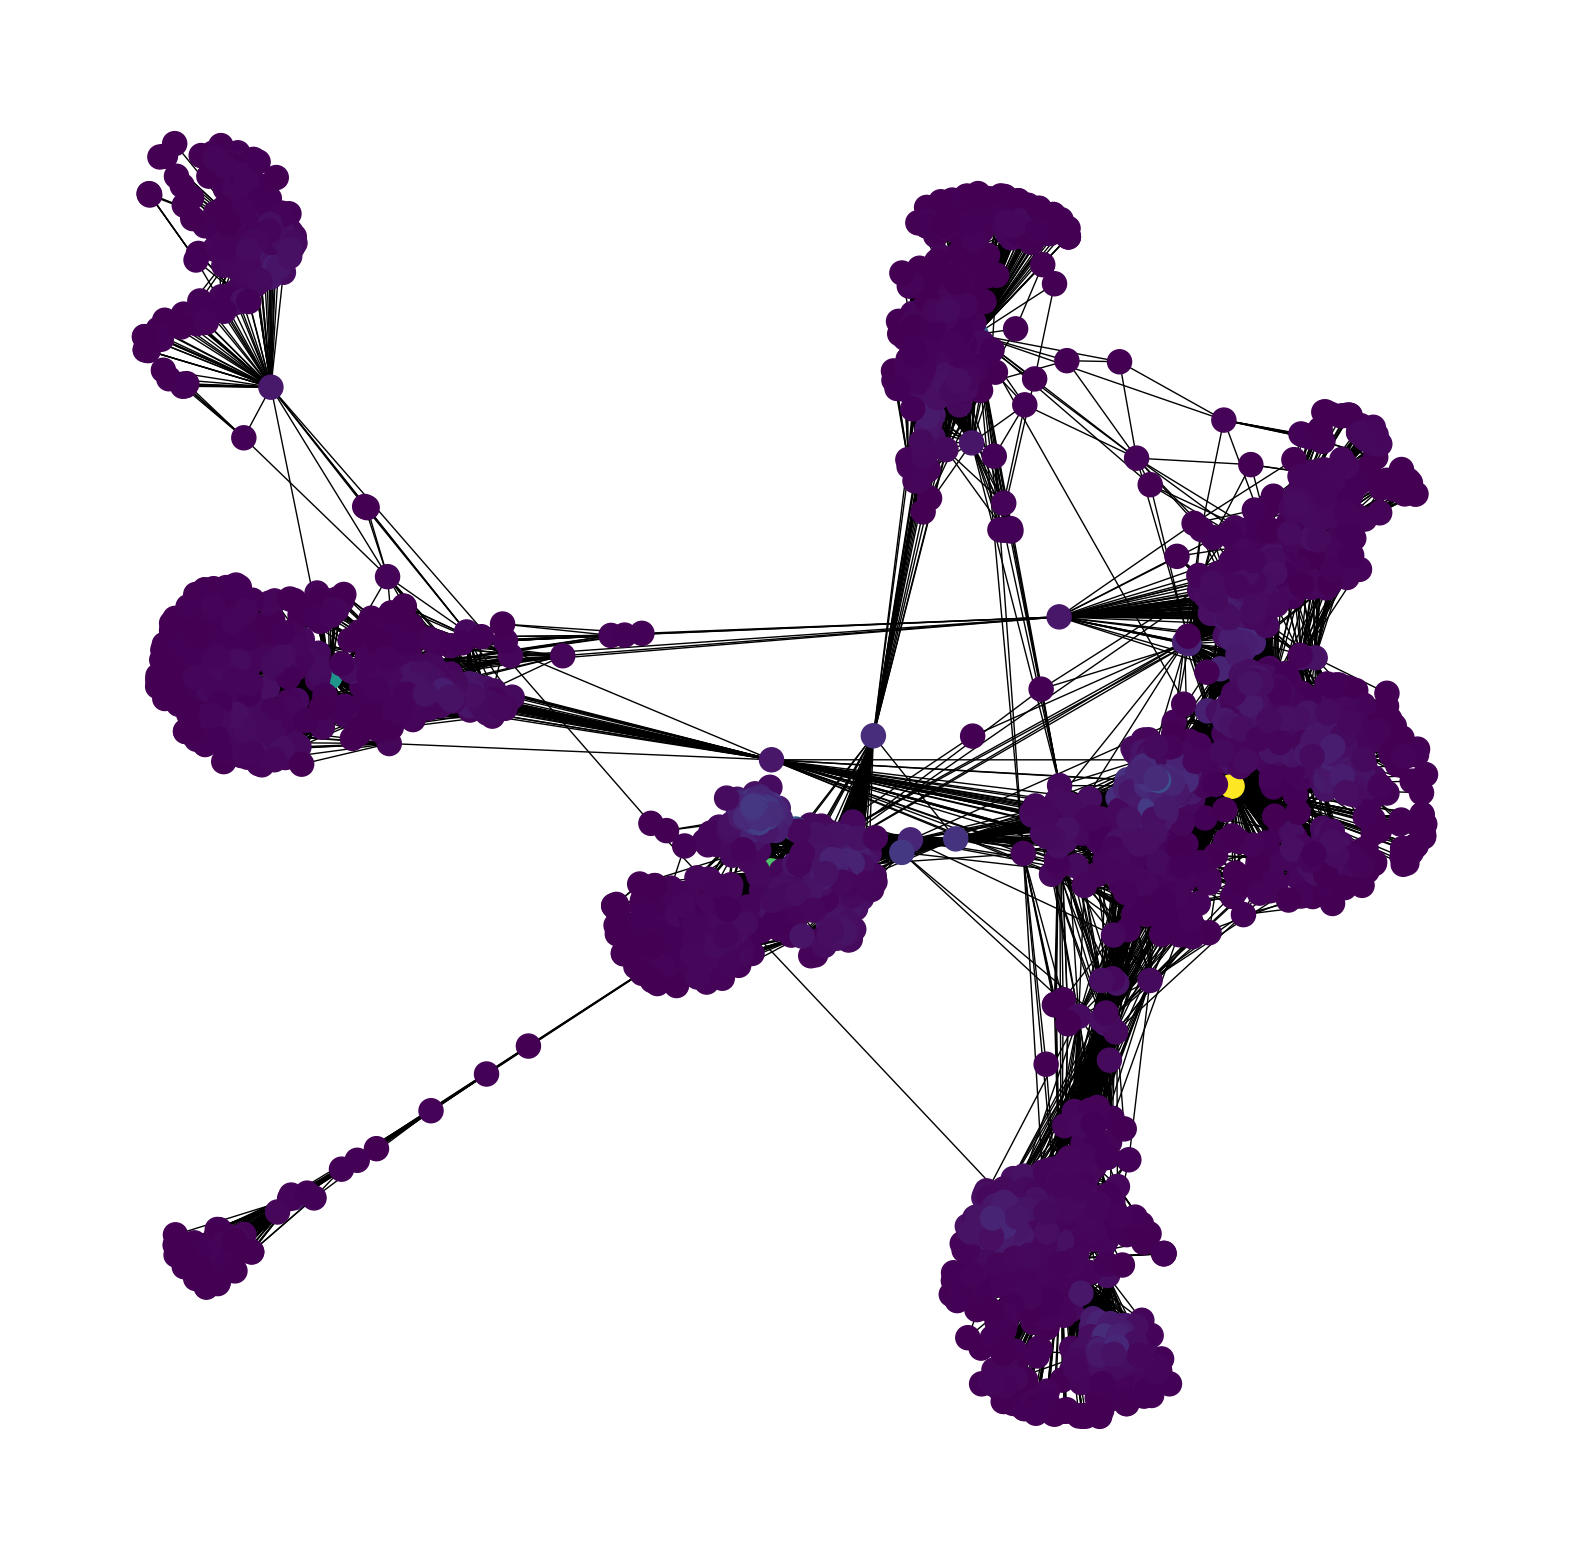

In [46]:
pos = nx.spring_layout(G_fb)
# betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
# node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 )
plt.axis('off')

In [47]:
import netwulf as nf

In [50]:
nf.visualize(G_fb)

(None, None)

![](../docs/img/netwulf/01_fb.png)

![](../docs/img/netwulf/02_fb.png)

![](../docs/img/netwulf/03_fb.png)

# Trabajo futuro
- 01 - Sistema de recomendación con graph machine learning
- 02 - GNNs
- 03 - Dynamic GNNs

# References



https://towardsdatascience.com/graph-machine-learning-with-python-pt-1-basics-metrics-and-algorithms-cc40972de113

https://towardsdatascience.com/graph-machine-learning-with-python-pt-2-random-graphs-and-diffusion-models-of-cryptopunks-trading-99cd5170b5ea

https://towardsdatascience.com/graph-machine-learning-with-python-part-3-unsupervised-learning-aa2854fe0ff2

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/